## Performance of CNN models on MNIST Dataset

## Load and preprocess the MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load MNIST data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension (1 for grayscale)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a function to compile the model
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Step 2: Define the CNN Architectures

In [3]:
def lenet_5():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)),
        layers.AvgPool2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='tanh'),
        layers.AvgPool2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)

In [4]:
def alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Conv2D(384, (3, 3), activation='relu'),
        layers.Conv2D(384, (3, 3), activation='relu'),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)


In [5]:
def alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)), # Reduced kernel size and stride
        layers.MaxPool2D((2, 2), strides=(2, 2)),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'), # Reduced kernel size
        layers.MaxPool2D((2, 2), strides=(2, 2)),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'), # Reduced kernel size
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'), # Reduced kernel size
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'), # Reduced kernel size
        layers.MaxPool2D((2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)

In [6]:
def googlenet():
    model = models.Sequential([
        layers.Conv2D(64, (7, 7), strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Conv2D(192, (3, 3), padding='same', activation='relu'),
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Conv2D(128, (1, 1), activation='relu'),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.Conv2D(256, (1, 1), activation='relu'),
        layers.Conv2D(512, (3, 3), activation='relu'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)


In [7]:
def googlenet():
    model = models.Sequential([
        layers.Conv2D(64, (7, 7), strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Conv2D(192, (3, 3), padding='same', activation='relu'),  
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'), 
        # Adjust padding to 'same' to maintain spatial dimensions
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),  
        # Adjust padding to 'same' to maintain spatial dimensions
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)

In [8]:
def vggnet():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)

In [9]:
#Resnet-18
def resnet():
    model = models.Sequential([
        layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPool2D((3, 3), strides=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)

In [10]:
def xception():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)

In [11]:
#SENet (Squeeze-and-Excitation)
def senet():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax')
    ])
    return compile_model(model)

Step 3: Train each model on the dataset

In [12]:
models_dict = {
    'LeNet-5': lenet_5(),
    'AlexNet': alexnet(),
    'GoogLeNet': googlenet(),
    'VGGNet': vggnet(),
    'ResNet': resnet(),
    'Xception': xception(),
    'SENet': senet()
}

history_dict = {}

for name, model in models_dict.items():
    print(f"Training {name}...")
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    history_dict[name] = history


c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training LeNet-5...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8506 - loss: 0.5103 - val_accuracy: 0.9613 - val_loss: 0.1297
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9651 - loss: 0.1137 - val_accuracy: 0.9757 - val_loss: 0.0775
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9772 - loss: 0.0719 - val_accuracy: 0.9798 - val_loss: 0.0644
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9840 - loss: 0.0529 - val_accuracy: 0.9819 - val_loss: 0.0549
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9825 - val_loss: 0.0542
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.9837 - val_loss: 0.0473
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9833 - val_loss: 0.0498
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9923 - loss: 0.02

Step 4: Evaluate the performance

In [13]:
# Function to evaluate and print performance metrics
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(classification_report(y_true, y_pred_classes))
    return y_pred_classes

# Evaluate each model
for name, model in models_dict.items():
    print(f"Evaluating {name}...")
    evaluate_model(model, x_test, y_test)

Evaluating LeNet-5...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Evaluating AlexNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
    

Step 5: Plot loss and accuracy curves

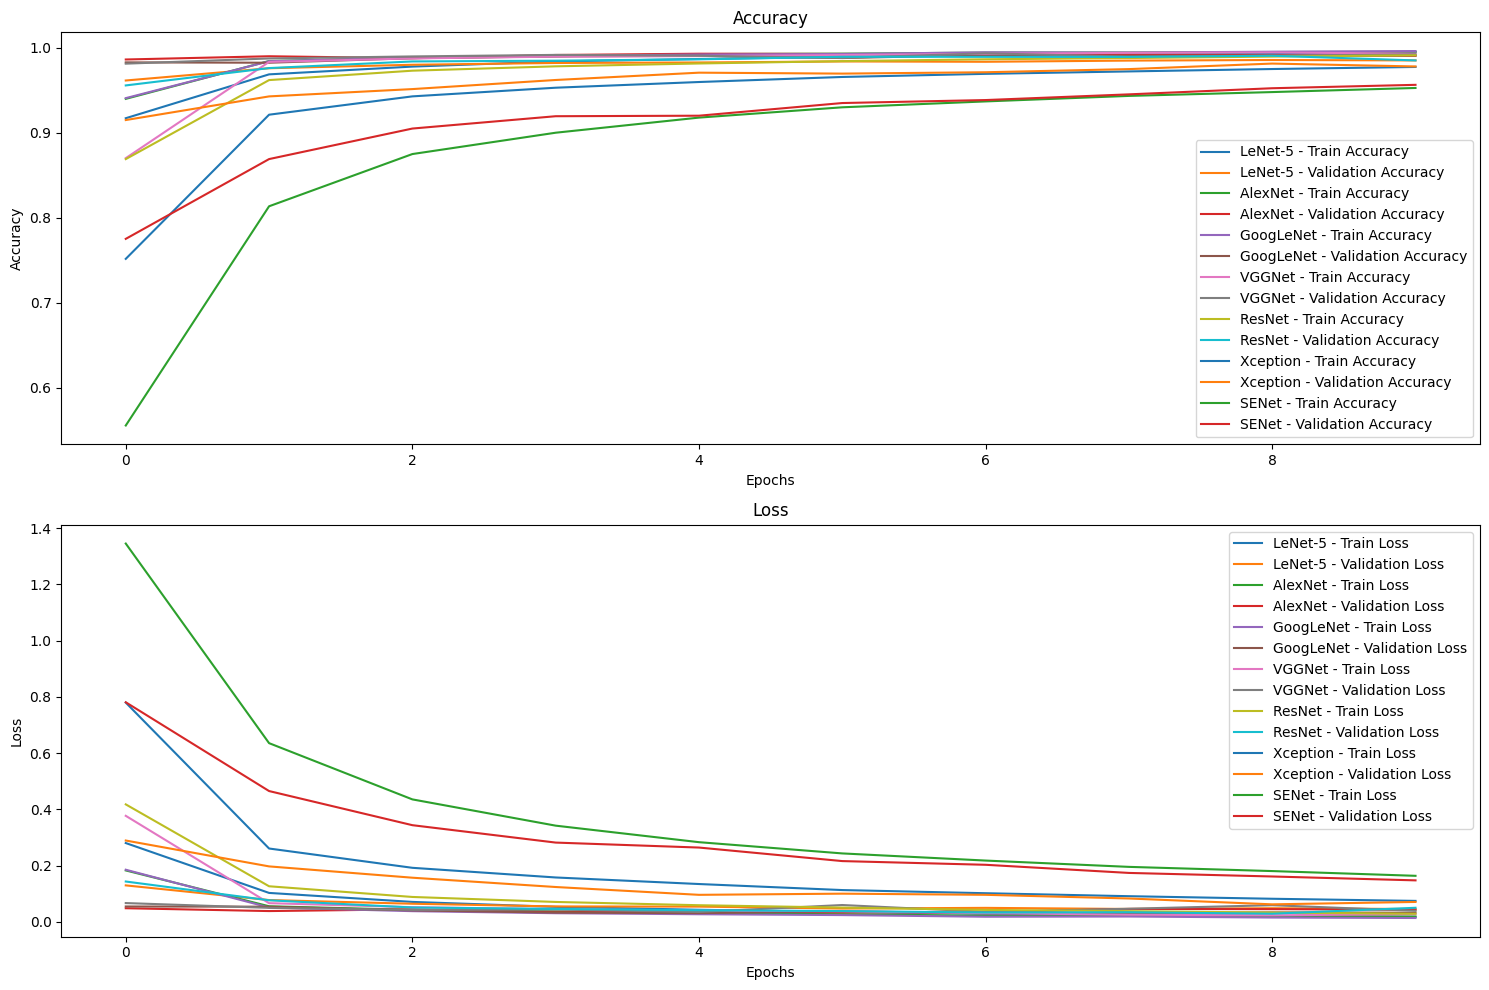

In [14]:
def plot_metrics(history_dict):
    plt.figure(figsize=(15, 10))
    
    for name, history in history_dict.items():
        # Plot training and validation accuracy
        plt.subplot(2, 1, 1)
        plt.plot(history.history['accuracy'], label=f'{name} - Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} - Validation Accuracy')
        
        # Plot training and validation loss
        plt.subplot(2, 1, 2)
        plt.plot(history.history['loss'], label=f'{name} - Train Loss')
        plt.plot(history.history['val_loss'], label=f'{name} - Validation Loss')

    plt.subplot(2, 1, 1)
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history_dict)
